In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [8]:
#read advertising dataset
data = pd.read_csv("Lec2-Linear-Regression/Advertising.csv", index_col = 0)

#clean the dataset
cleaned_data = data.fillna(0)

In [9]:
cleaned_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [10]:
# standardize data
x_scaled = preprocessing.scale(cleaned_data)

# convert array from above to dataframe
x_scaled = pd.DataFrame(x_scaled, columns = ['TV','Radio','Newspaper','Sales'])

In [11]:
x_scaled

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [12]:
# define dataset for x (value for a predictor (dependent variable))
x = x_scaled.drop("Sales", axis = 1)
x.insert(0,'bias',[1]*len(x))

# define dataset for h (value for sales (independent variable))
h = x_scaled["Sales"]

# split training data from testing data 
x_train, x_test, h_train, h_test = train_test_split(x, h, test_size = 0.25, random_state = 42) 

## Fitting the Model

In [13]:
def initialize_weights():
    # initialize 1x4 array with random values
    init_w = np.random.uniform(0,1,(1,4))
    return init_w

In [14]:
def predict(x_dataset, weights):
    # compute for predicted values
    predicted_val = np.sum(np.multiply(x_dataset, weights),axis=1)
    return predicted_val

In [15]:
def error(predicted_val, actual_val):
    # calculate for difference between predicted values and the actual values
    error_val = predicted_val - actual_val
    return error_val

In [16]:
# compute for value of the cost function
def compute_cost(num_items, error_val):
    square_diff = error_val ** 2
    cost_val = np.sum(square_diff)/(2*num_items)
    return cost_val

In [17]:
# compute for the gradient
def compute_gradient(learning_rate, error_val, x_dataset):
    # reshape error val into a 1 column vector 
    error_val_arr = np.array(error_val).reshape(len(error_val),1)
    gradient = learning_rate * (np.sum(np.multiply(error_val_arr,x_dataset),axis=0))/len(x_dataset)
    return gradient

In [18]:
def update_weights(weights, gradient):
    new_weights = weights - np.asarray(gradient).reshape(1,4)
    return new_weights

In [19]:
def grad_descent(x_dataset, actual_val, learning_rate, max_iterations):
    num_items = len(x_dataset)
    
    cost_val_arr = []
    weights = initialize_weights()
    current_weights = weights

    iterations = 1
    while(iterations != max_iterations):
        predicted_val = predict(x_dataset, current_weights)
        error_val = error(predicted_val,actual_val)
        cost_val = compute_cost(num_items, error_val)
        gradient = compute_gradient(learning_rate, error_val, x_dataset)
        current_weights = update_weights(current_weights, gradient)
        weights = np.r_[weights,current_weights]
        cost_val_arr.append(cost_val)
        iterations+=1
    
    return weights, cost_val_arr


In [20]:
def plot_costs(cost_val):
    fig = plt.figure(figsize=(15,8))
    iteration = range(len(cost_val))
    costs = cost_val
    plt.plot(iteration, costs)
    plt.show()

In [1500]:
learning_rate = 0.1
max_iterations = 100

fit_train_set = grad_descent(x_train, h_train, learning_rate, max_iterations)
final_weights = fit_train_set[0][-1]
final_weights

array([-0.00585677,  0.74769858,  0.54308594,  0.0126928 ])

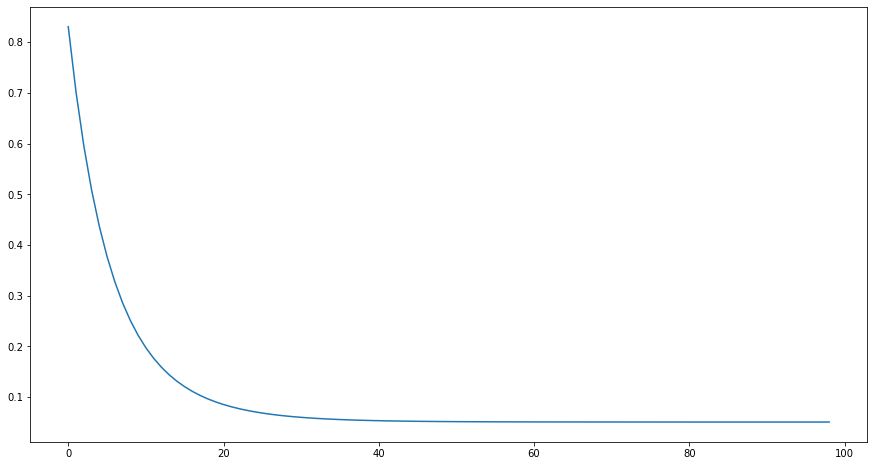

In [1501]:
plot_costs(fit_train_set[1])

## Predicting and Evaluating Model using the train set 

In [1502]:
predict_train = predict(x_train, final_weights)
error_val = error(predict_train, h_train)
train_cost = compute_cost(len(x_train),error_val )
train_cost

0.05109699828608757

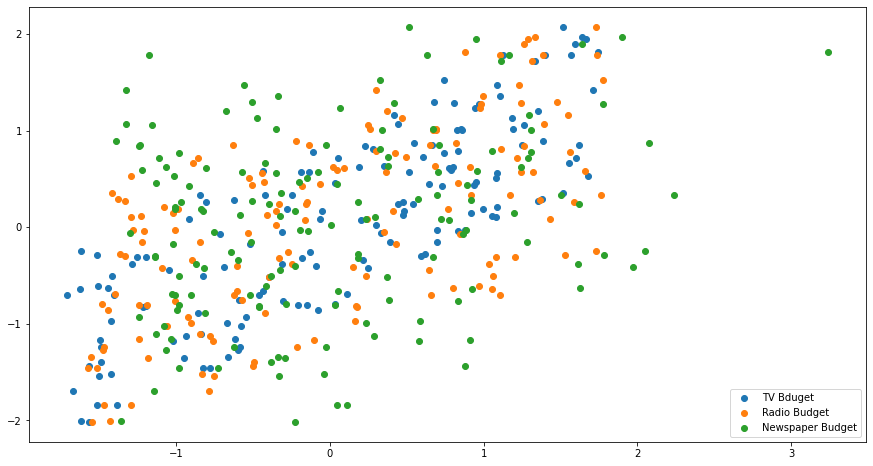

In [1503]:
yhat_train_scatter_fig = plt.figure(figsize=(15,8))
plt.scatter(x_train["TV"], predict_train, label="TV Bduget")
plt.scatter(x_train["Radio"], predict_train, label="Radio Budget")
plt.scatter(x_train["Newspaper"], predict_train, label="Newspaper Budget")
plt.legend()                    
plt.show()

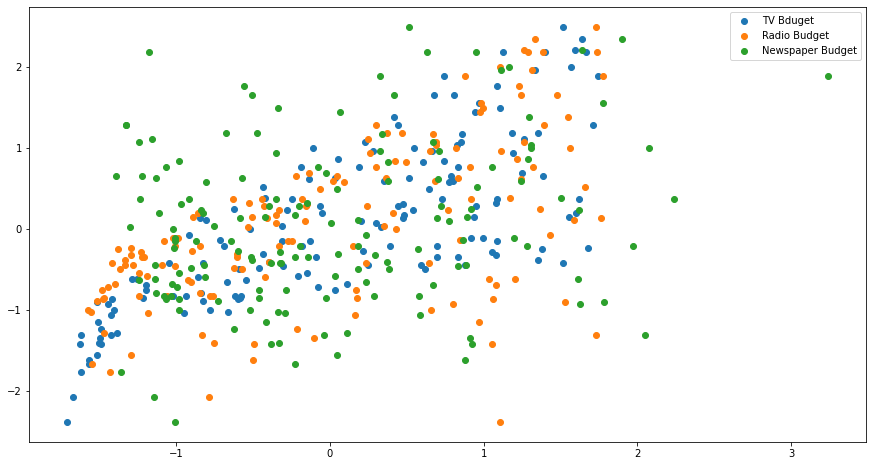

In [1504]:
y_train_scatter_fig = plt.figure(figsize=(15,8))
plt.scatter(x_train["TV"], h_train, label="TV Bduget")
plt.scatter(x_train["Radio"], h_train, label="Radio Budget")
plt.scatter(x_train["Newspaper"], h_train, label="Newspaper Budget")
plt.legend()                    
plt.show()

In [1505]:
r2_score(predict_train, h_train)

0.8845933297446386

## Predicting and Evaluating Model using the test set 

In [1506]:
predict_test = predict(x_test, final_weights)
error_val = error(predict_test, h_test)
train_cost = compute_cost(len(x_test),error_val )
train_cost

0.053211554905442035

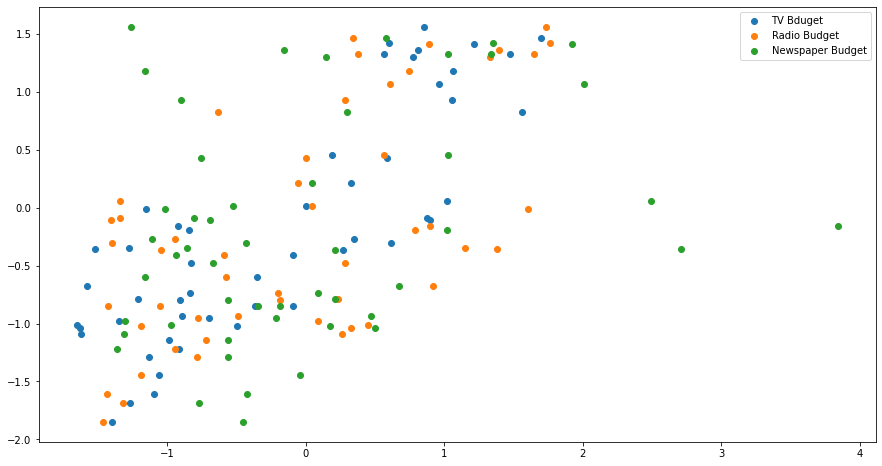

In [1507]:
y_scatter_fig = plt.figure(figsize=(15,8))
plt.scatter(x_test["TV"], predict_test, label="TV Bduget")
plt.scatter(x_test["Radio"], predict_test, label="Radio Budget")
plt.scatter(x_test["Newspaper"], predict_test, label="Newspaper Budget")
plt.legend()                    
plt.show()

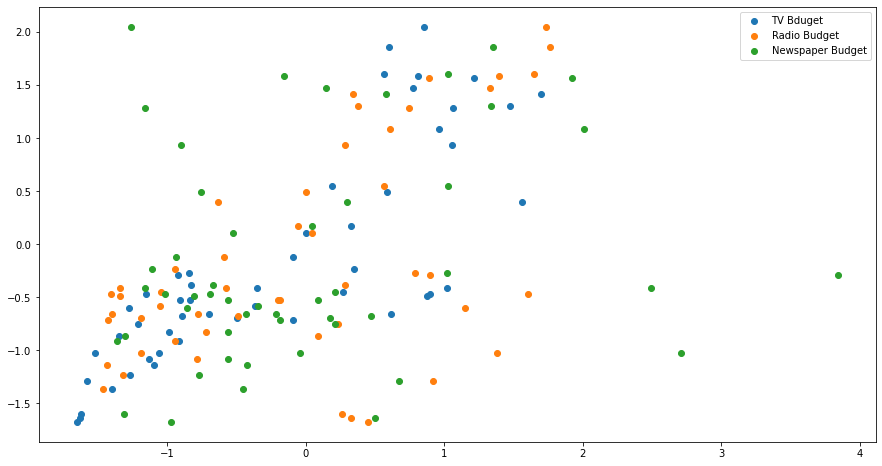

In [1508]:
y_scatter_fig = plt.figure(figsize=(15,8))
plt.scatter(x_test["TV"], h_test, label="TV Bduget")
plt.scatter(x_test["Radio"], h_test, label="Radio Budget")
plt.scatter(x_test["Newspaper"], h_test, label="Newspaper Budget")
plt.legend()                    
plt.show()

In [1509]:
r2_score(predict_test, h_test)

0.8841404695708734

## Finding the optimal number of iterations

In [1510]:
learning_rate = 0.1
max_iterations = 1000

fit_train_set_1k_iter = grad_descent(x_train, h_train, learning_rate, max_iterations)

In [1592]:
weights = fit_train_set_1k_iter[0]
predictions = [predict(x_test, weights[0][0]).tolist()]
errors = [error(predictions[0], h_test).tolist()]
r2 = [r2_score(predictions[0], h_test)]
cost = [compute_cost(len(x_test), np.asarray(errors[0]))]

In [1595]:
for i in range(1, max_iterations):
    #predictions
    predictions_per_iteration = predict(x_test, weights[i]).tolist()
    predictions.append(predictions_per_iteration)
    #errors
    error_per_iteration = error(predictions[i], h_test).tolist()
    errors.append(error_per_iteration)
    #r2 score
    r2_per_iteration = r2_score(predictions[i],h_test)
    r2.append(r2_per_iteration)
    #cost
    cost_per_iteration = compute_cost(len(x_test), np.asarray(errors[i]))
    cost.append(cost_per_iteration)

In [1598]:
errors = np.asarray(errors)
r2 = np.asarray(r2)
cost = np.asarray(cost)

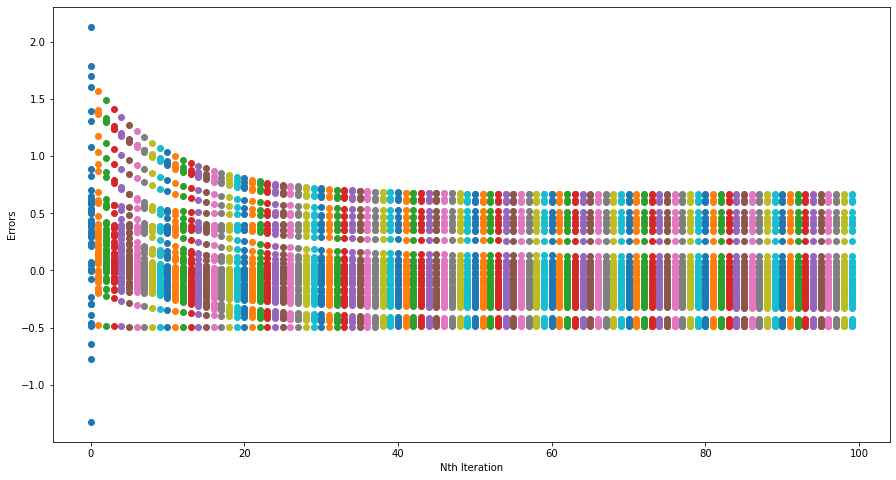

In [1600]:
fig_errors = plt.figure(figsize=(15,8))

for i in range(100):
    plt.scatter([i]*50, errors[i])
plt.ylabel("Errors")
plt.xlabel("Nth Iteration")
plt.show()

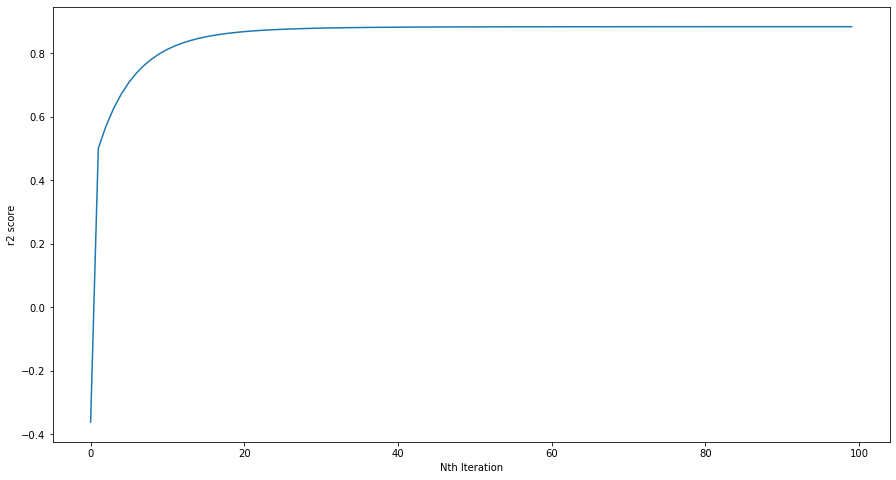

In [1602]:
fig_r2 = plt.figure(figsize=(15,8))
x = range(100)
y = r2[:100]
plt.plot(x,y)
plt.ylabel("r2 score")
plt.xlabel("Nth Iteration")
plt.show()

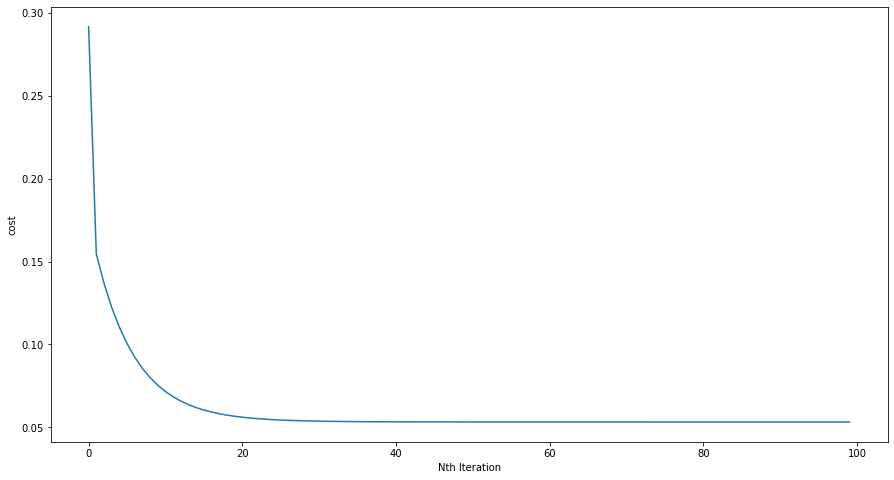

In [1604]:
fig_r2 = plt.figure(figsize=(15,8))
x = range(100)
y = cost[:100]
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("Nth Iteration")
plt.show()

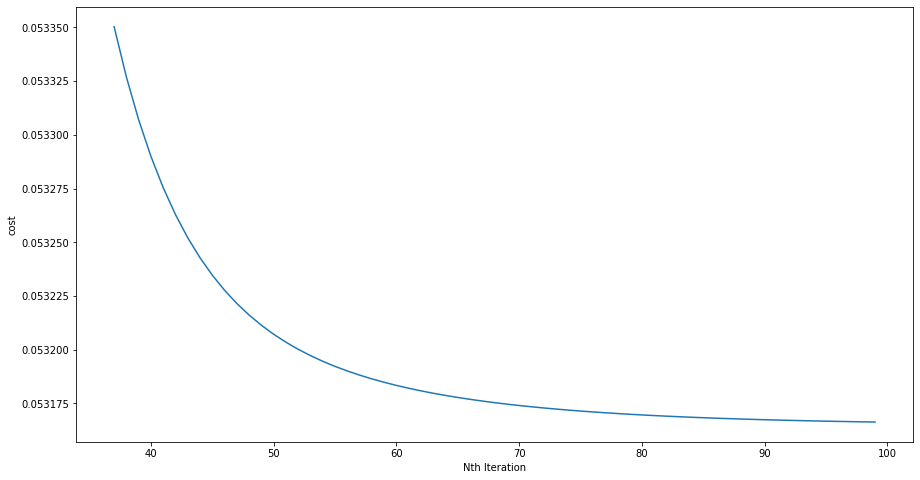

In [1606]:
fig_cost2 = plt.figure(figsize=(15,8))
x = range(37, 100)
y = cost[37:100]
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("Nth Iteration")
plt.show()

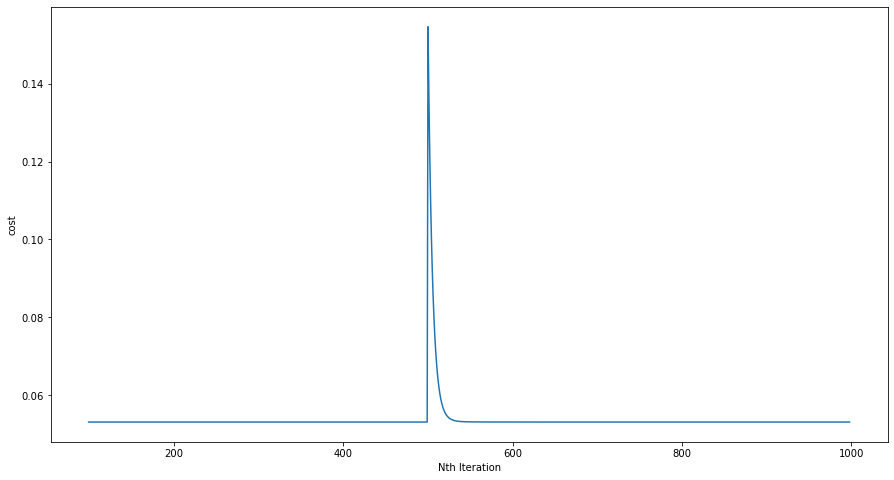

500


In [1608]:
fig_cost3 = plt.figure(figsize=(15,8))
ax1 = range(99, 999)
ax2 = cost[99:999]
plt.plot(ax1,ax2)
plt.ylabel("cost")
plt.xlabel("Nth Iteration")
plt.show()

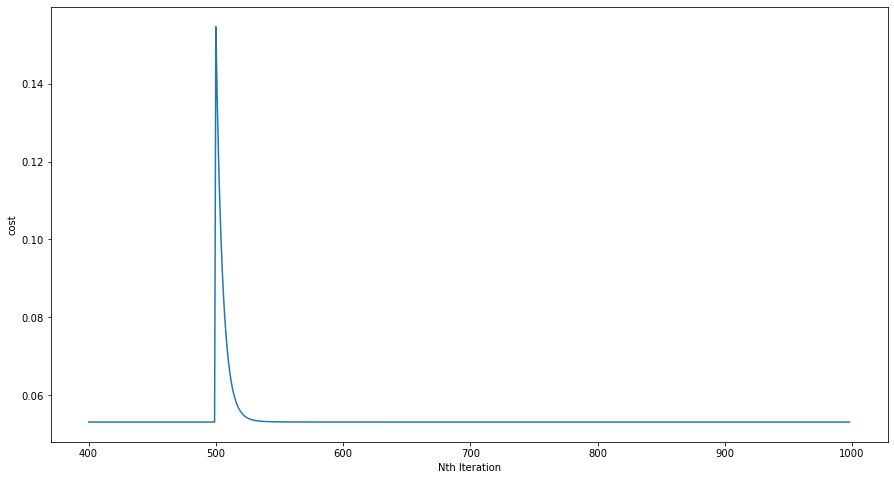

In [1615]:
fig_cost2 = plt.figure(figsize=(15,8))
x = range(400, 999)
y = cost[400:999]
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("Nth Iteration")
plt.show()

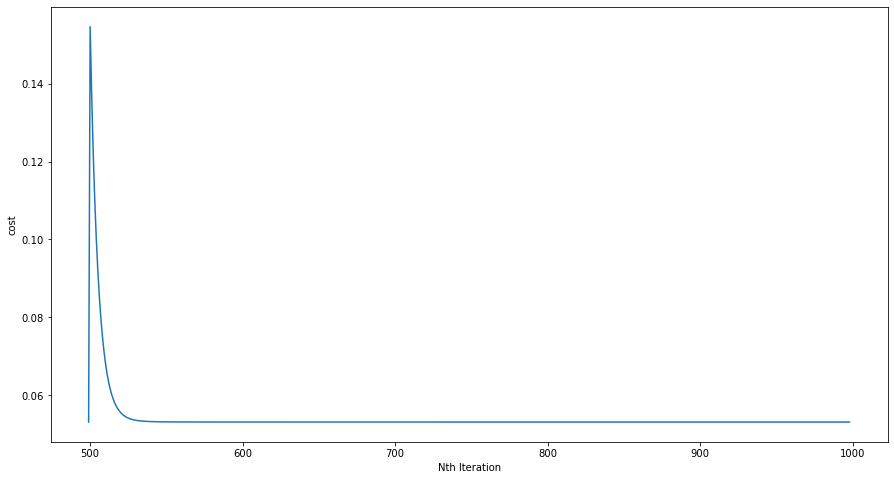

In [1618]:
fig_cost2 = plt.figure(figsize=(15,8))
x = range(499, 999)
y = cost[499:999]
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("Nth Iteration")
plt.show()

## Effect of Learning Rate to Cost and Error

In [21]:
learning_rate = [0.1,0.01,0.001,0.0001, 0.2]
learning_rate.sort()
max_iterations = 499
weights_per_learning_rate = []
costs_perIter_perLR = []

In [1702]:
for rate in learning_rate:
    model_fitting = grad_descent(x_test, h_test, rate, max_iterations)
    costs_perIter_perLR.append(model_fitting[1])
    weights_per_learning_rate.append(model_fitting[0][-1])

In [1658]:
# predictions per learning rate
predictions_per_learning_rate = []

for i in range(len(learning_rate)):
        prediction = predict(x_test, weights_per_learning_rate[i]).tolist()
        predictions_per_learning_rate.append(prediction)

In [1659]:
# errors per learning rate
errors_per_learning_rate = []
for i in range(len(learning_rate)):
    err = error(predictions[i], h_test).tolist()
    errors_per_learning_rate.append(err)

In [1660]:
# costs per learning rate
costs_per_learning_rate = []

for i in range(len(learning_rate)):
    cost_var = compute_cost(len(x_test), np.asarray(errors_per_learning_rate[i]))
    costs_per_learning_rate.append(cost_var)

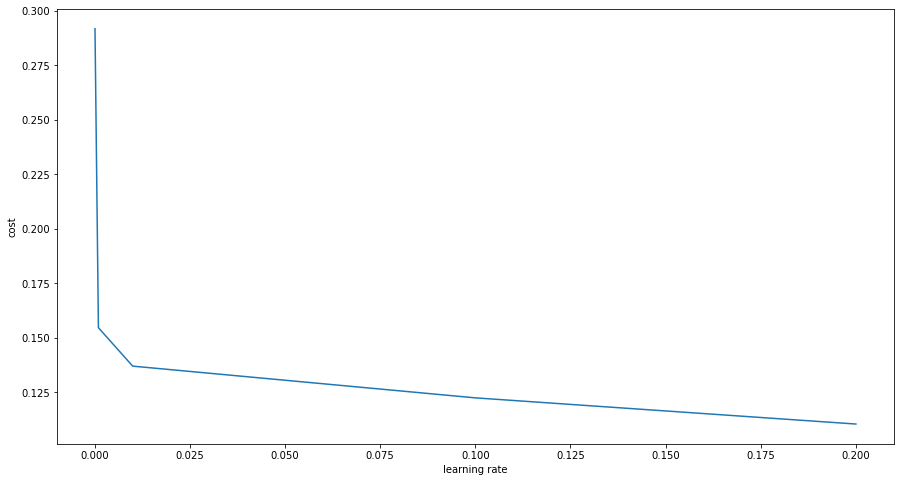

In [1662]:
# plotting the cost values
fig_cost3 = plt.figure(figsize=(15,8))
x = learning_rate
y = costs_per_learning_rate
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("learning rate")
plt.show()

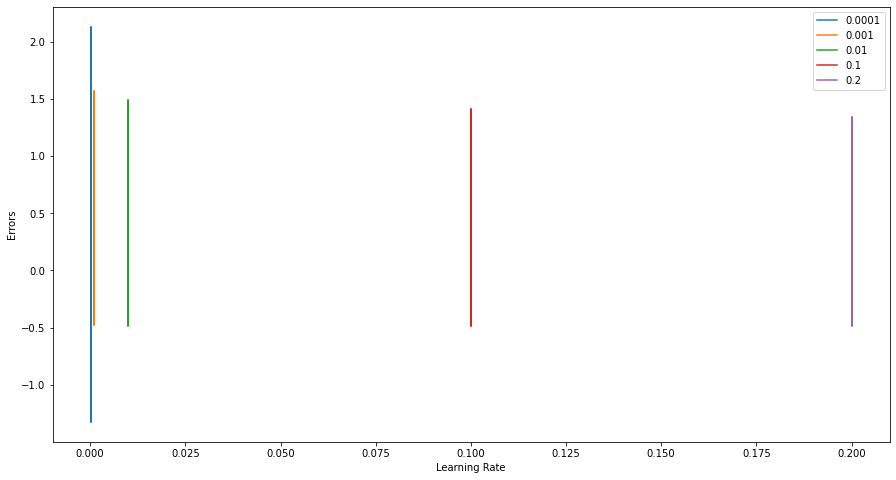

In [1718]:
# plotting the error values

fig_errors2 = plt.figure(figsize=(15,8))

for i in range(len(learning_rate)):
    plt.plot([learning_rate[i]]*len(x_test), errors_per_learning_rate[i])

plt.legend(learning_rate)
plt.ylabel("Errors")
plt.xlabel("Learning Rate")
plt.show()

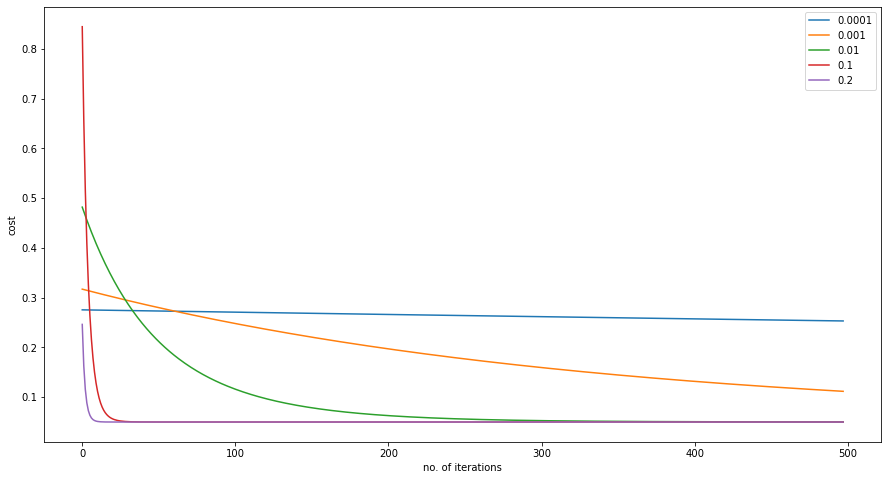

In [1717]:
# plotting the cost values vs optimal number of iteration per learning rate
fig_cost_vs_iteration = plt.figure(figsize=(15,8))

for i in range(len(learning_rate)):
    plt.plot(list(range(498)), costs_perIter_perLR[i])
plt.ylabel("cost")
plt.xlabel("no. of iterations")
plt.legend(learning_rate)
plt.show()

## learning rate and number of iterations

In [22]:
# plotting the error values

In [23]:
max_iterations = 1000
weights_per_learning_rate2 = []

In [24]:
for rate in learning_rate:
    model_fitting2 = grad_descent(x_test, h_test, rate, max_iterations)
    weights_per_learning_rate2.append(model_fitting2[0][-1])

In [25]:
weights_per_learning_rate2

[array([0.58598784, 0.45603283, 0.06339465, 0.12252271]),
 array([0.16422302, 0.70530794, 0.57571838, 0.07576814]),
 array([ 0.02380969,  0.7815681 ,  0.50535551, -0.03956361]),
 array([ 0.02369256,  0.78146366,  0.50526933, -0.03947995]),
 array([ 0.02369256,  0.78146366,  0.50526933, -0.03947995])]

In [26]:
# predictions per learning rate
predictions_per_learning_rate2 = []
for i in range(len(learning_rate)):
        prediction2 = predict(x_test, weights_per_learning_rate2[i]).tolist()
        predictions_per_learning_rate2.append(prediction2)

In [27]:
# errors per learning rate
errors_per_learning_rate2 = []
for i in range(len(learning_rate)):
    err2 = error(prediction2[i], h_test).tolist()
    errors_per_learning_rate2.append(err2)

In [28]:
# costs per learning rate
costs_per_learning_rate2 = []

for i in range(len(learning_rate)):
    cost_var2 = compute_cost(len(x_test), np.asarray(errors_per_learning_rate2[i]))
    costs_per_learning_rate2.append(cost_var2)

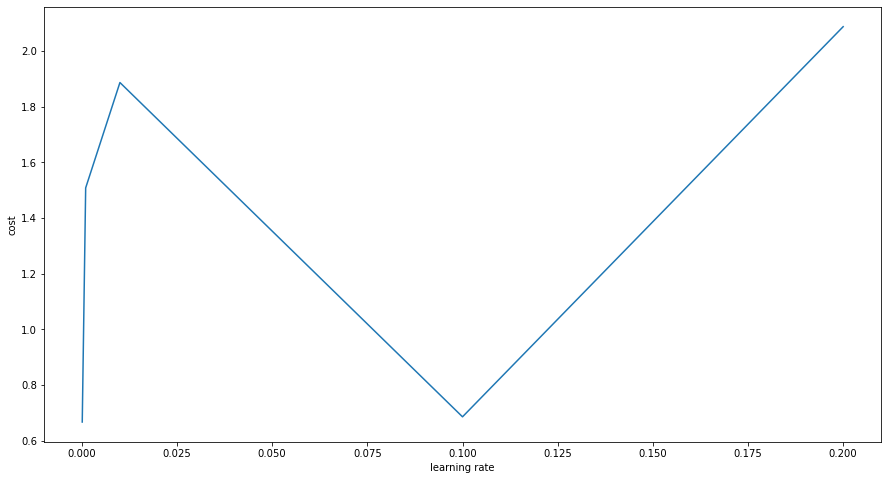

In [29]:
# plotting the cost values
fig_cost4 = plt.figure(figsize=(15,8))
x = learning_rate
y = costs_per_learning_rate2
plt.plot(x,y)
plt.ylabel("cost")
plt.xlabel("learning rate")
plt.show()

## Using sklearn's OLS

In [134]:
model = linear_model.LinearRegression()
model.fit(x_train[["TV","Radio","Newspaper"]],h_train)
y_pred = model.predict(x_test[["TV", "Radio", "Newspaper"]])

In [137]:
print("OLS Results")
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Sales = {intercept:.4f} + ({tv_weight:.4f}, * TV) + ({radio_weight:.4f} * radio) + ({newspaper_weight:.4f} * newspaper)"
    .format(intercept = model.intercept_, tv_weight = model.coef_[0], radio_weight = model.coef_[1], 
    newspaper_weight = model.coef_[2]))
print("MSE: ", mean_squared_error(h_test, y_pred))
print("r2 score: ", r2_score(y_pred, h_test))

OLS Results
Coefficient:  [0.74761782 0.54480926 0.01071968]
Intercept:  -0.0059607687141377055
Sales = -0.0060 + (0.7476, * TV) + (0.5448 * radio) + (0.0107 * newspaper)
MSE:  0.10632987436773611
r2 score:  0.8843196200174288


## Grad Descent from Scratch

In [41]:
weights_scratch = np.asarray([-0.00585677,  0.74769858,  0.54308594,  0.0126928 ])
weights_scratch

array([-0.00585677,  0.74769858,  0.54308594,  0.0126928 ])

In [96]:
predict_scratch = predict(x_test, weights_scratch)
predict_scratch.tolist().sort()

In [44]:
error_scratch = error(predict_scratch, h_test)

In [45]:
cost_scratch = compute_cost(len(x_test),error_scratch)

In [108]:
print("Gradient Descent")
print("Coeffecient: ", weights_scratch[1:])
print("Intercept: ", weights_scratch[0])
print("Sales = {intercept:.4f} + ({tv_weight:.4f}, * TV) + ({radio_weight:.4f} * radio) + ({newspaper_weight:.4f} * newspaper)"
    .format(intercept = weights_scratch[0], tv_weight = weights_scratch[1], radio_weight = weights_scratch[2], 
    newspaper_weight = weights_scratch[3]))
print("MSE: ", mean_squared_error(h_test, predict_scratch))
print("r2 score: ", r2_score(predict_scratch, h_test))

Gradient Descent
Coeffecient:  [0.74769858 0.54308594 0.0126928 ]
Intercept:  -0.00585677
Sales = -0.0059 + (0.7477, * TV) + (0.5431 * radio) + (0.0127 * newspaper)
MSE:  0.10642310968374742
r2 score:  0.8841404707931019
